In [1]:
import matplotlib.pyplot as plt
import itertools
import functools
import statistics
import math

plt.rc('image', cmap='viridis')
print(plt.style.available)
plt.style.use('dark_background')


def Input(day):
    "Open input file for the day"
    file = '2021/input{0}.txt'.format(day)
    return open(file)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Day 5


In [2]:
def build_map(lines, diagonal=False):
    map = [[0]*1000 for _ in range(1000)]

    for start, end in lines:
        if start[0] == end[0]:
            x = start[0]
            increment = -1 if start[1] > end[1] else 1
            for y in range(start[1], end[1] + increment, increment):
                map[x][y] += 1
        elif start[1] == end[1]:
            y = start[1]
            increment = -1 if start[0] > end[0] else 1
            for x in range(start[0], end[0] + increment, increment):
                map[x][y] += 1
        elif diagonal:
            x_increment = -1 if start[0] > end[0] else 1
            y_increment = -1 if start[1] > end[1] else 1
            y = start[1]
            for x in range(start[0], end[0] + x_increment, x_increment):
                map[x][y] += 1
                y += y_increment
    return map


def part_one(lines):
    points = [point for line in build_map(lines) for point in line]
    return len(list(filter(lambda x: x >= 2, points)))


def part_two(lines):
    sea_map = build_map(lines, True)
    points = [point for line in sea_map for point in line]

    return len(list(filter(lambda x: x >= 2, points)))


with Input(5) as f:
    lines = [tuple(tuple(map(int, x.split(',')))
                   for x in line.split('->')) for line in f]
    res = part_one(lines)
    print(res)
    res = part_two(lines)
    print(res)


6113
20373


## Day 6


372300
1675781200288


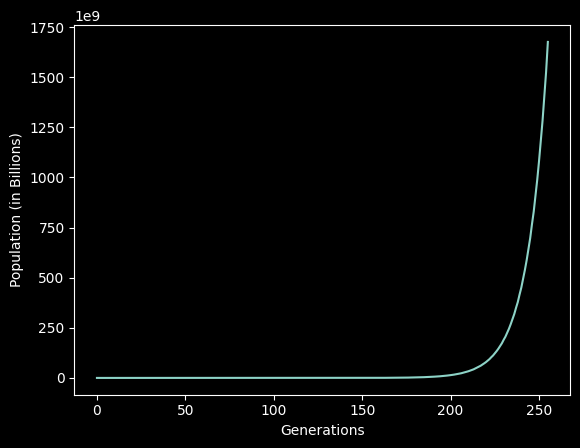

In [3]:
def next(state):
    next_state = {}
    for age, n in state.items():
        if age > 0:
            next_state[age-1] = n + next_state[age -
                                               1] if age-1 in next_state else n
        else:
            next_state[6] = n + next_state[6] if 6 in next_state else n
            next_state[8] = n

    return next_state


def condense(state):
    return {k: len(list(v)) for k, v in itertools.groupby(sorted(state))}


with Input(6) as f:
    state = condense(list(map(int, f.readline().split(','))))
    totals = []
    for i in range(256):
        state = next(state)
        totals.append(sum(state.values()))
    print(totals[79])
    print(totals[255])

    fig, ax = plt.subplots()

    plt.ylabel('Population (in Billions)')
    plt.xlabel('Generations')
    ax.ticklabel_format(axis='y', scilimits=(9, 9))
    ax.plot(totals)

    plt.show()


## Day 7


340056


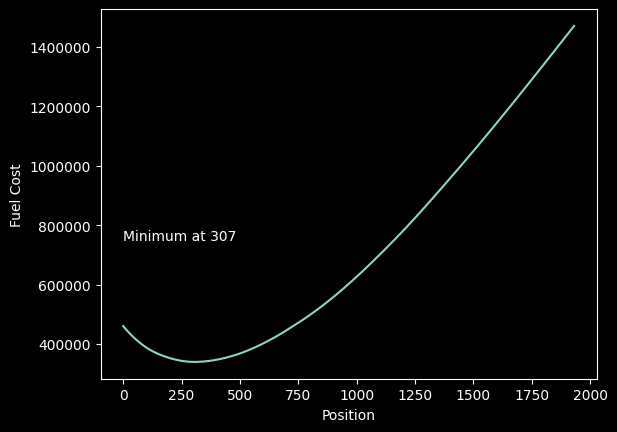

In [4]:
def align_to(position):
    return lambda x: abs(x - position)


96233485


def align_factorial(position):
    return lambda x: sum(range(0, abs(x-position)+1))


with Input(7) as f:
    positions = list(map(int, f.readline().split(',')))
    median = statistics.median(positions)

    low = min(positions)
    high = max(positions)

    costs = []
    for i in range(low, high+1):
        cost = align_to(i)
        costs.append(sum([cost(n) for n in positions]))

    min_cost = min(costs)
    min_pos = costs.index(min(costs))
    print(min(costs))

    fig, ax = plt.subplots()

    plt.ylabel('Fuel Cost')
    plt.xlabel('Position')
    ax.ticklabel_format(style='plain')
    ax.annotate(
        "Minimum at {}".format(min_pos),
        xy=(min_pos, min_cost),
        xytext=(0, 750000),
        arrowprops=dict(ec='black', fc='black', arrowstyle="-|>",
                        connectionstyle="arc3,rad=0.3"),
    )
    ax.plot(costs)

    plt.show()

    # costs = []
    # for i in range(low, high+1):
    #     cost = align_factorial(i)
    #     costs.append(sum([cost(n) for n in positions]))

    # print(min(costs))


## Day 8


In [5]:
def get_decoder(one, four, seven, eight):
    one = set(one)
    four = set(four)
    seven = set(seven)
    eight = set(eight)

    def decoder(signal):
        signal = set(signal)
        if signal == one:
            return '1'
        elif signal == four:
            return '4'
        elif signal == seven:
            return '7'
        elif signal == eight:
            return '8'
        elif len(signal) == 6:
            if four.issubset(signal):
                return '9'
            elif one.issubset(signal):
                return '0'
            else:
                return '6'
        else:
            if one.issubset(signal):
                return '3'
            elif len(four.intersection(signal)) == 3:
                return '5'
            else:
                return '2'
    return decoder


with Input('8') as f:
    displays: "list[tuple[list, list]]" = []
    for line in f:
        signals, output = line.split('|')
        displays.append((signals.split(), output.split()))

    print(len([digit for _, output in displays for digit in output if len(
        digit) in [2, 3, 4, 7]]))

    total = 0
    for signals, output in displays:
        key_values = [signal for signal in signals if len(signal) in [2, 3, 4, 7]]
        one, seven, four, eight = sorted(key_values, key=len)
        decode = get_decoder(one, four, seven, eight)

        display = int(''.join([decode(digit) for digit in output]))
        total += display
    print(total)


514
1012272


## Day 9: Smoke Basin

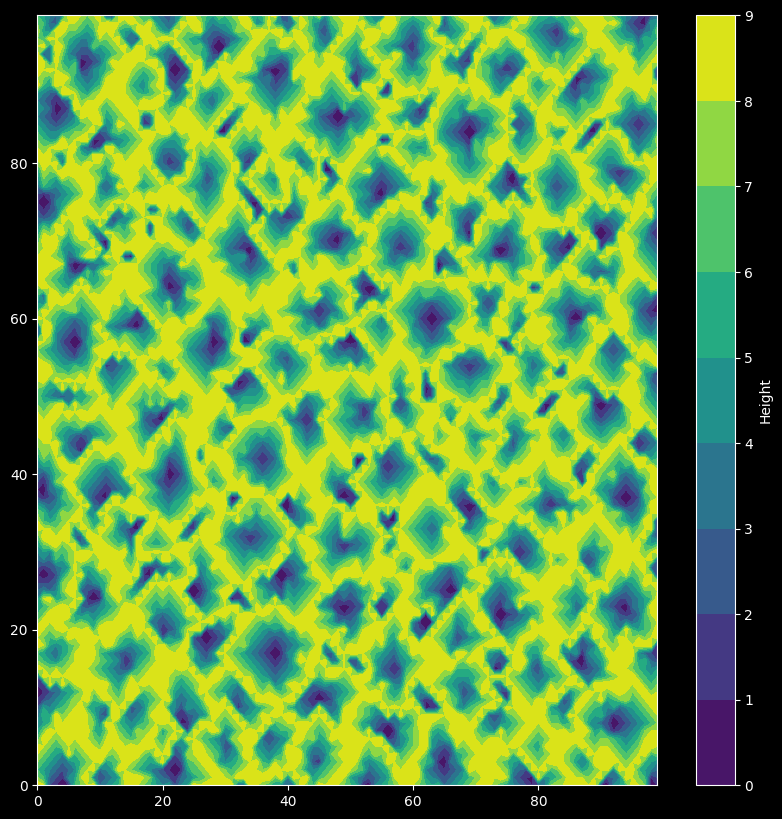

468
1280496


In [6]:
neighbor_indexes = [(y1, x1) for x1,y1 in itertools.permutations([-1,0,1], 2) if x1 == 0 or y1 == 0]

def neighbor_fn(height_map):
  return lambda item : [height_map[item[0][1] + y1][item[0][0] + x1] for y1,x1 in neighbor_indexes]

with Input('9') as f:
    height_map = [[int(height) for height in line.rstrip()] for line in f]

    fig, ax = plt.subplots(figsize=(10,10))
    ax.ticklabel_format(style='plain')
    cs = ax.contourf(height_map, levels=[0,1,2,3,4,5,6,7,8,9])
    plt.colorbar(cs, label="Height")
    plt.show()

    # pad height map
    for line in height_map:
      line.insert(0,9)
      line.append(9)
    height_map.insert(0, [9] * len(height_map[0]))
    height_map.append([9] * len(height_map[0]))

    for y in range(len(height_map)):
      for x in range(len(height_map[0])):
        height_map[y][x] = ((x, y), height_map[y][x])

    get_neighbors = neighbor_fn(height_map)

    local_min = []
    for line in height_map[1:-1]:
      for item in line[1:-1]:
        if all(map(lambda x: x[1] > item[1], get_neighbors(item))):
          local_min.append(item)

    
    print(sum([i[1] for i in local_min]) + len(local_min))

    def grow(neighbors):
      new_neighbors = [j for i in map(get_neighbors, neighbors) for j in i]
      neighbors = set(neighbors).union(set(new_neighbors))
      neighbors = filter(lambda x: x[1] != 9, neighbors)
      return list(neighbors)

    basins_sizes = []
    for minimum in local_min:
      basin = [minimum]
      while(True):
        new_basin = grow(basin)
        if len(new_basin) == len(basin):
          break
        else:
          basin = new_basin
      basins_sizes.append(len(basin))
    print(math.prod(sorted(basins_sizes)[-3:]))


